As bibliotecas necessárias são importadas. A biblioteca Numpy para manipulação numérica das matrizes, a biblioteca Pandas para criar os dataframes, a biblioteca para separar a matriz de teste e aprendizagem train_test_split, os modelos de algoritmo de classificação pedidos no exercício: Regressão Logística, Arvore de Decisão, RandomForest, KNeighbors, Gradient Boosting, uma biblioteca para pré-processamento do dataset (StandardScaler) e a biblioteca para medir a qualidade preditiva dos modelos (accuracy_score, confusion_matrix e classification_report)

In [3]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

Fazer a carga do dataset a partir do arquivo credtrain.txt, passando o nome das colunas.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ESCT     1499 non-null   int64
 1   NDEP     1499 non-null   int64
 2   RENDA    1499 non-null   int64
 3   TIPOR    1499 non-null   int64
 4   VBEM     1499 non-null   int64
 5   NPARC    1499 non-null   int64
 6   VPARC    1499 non-null   int64
 7   TEL      1499 non-null   int64
 8   IDADE    1499 non-null   int64
 9   RESMS    1499 non-null   int64
 10  ENTRADA  1499 non-null   int64
 11  CLASSE   1499 non-null   int64
dtypes: int64(12)
memory usage: 140.7 KB


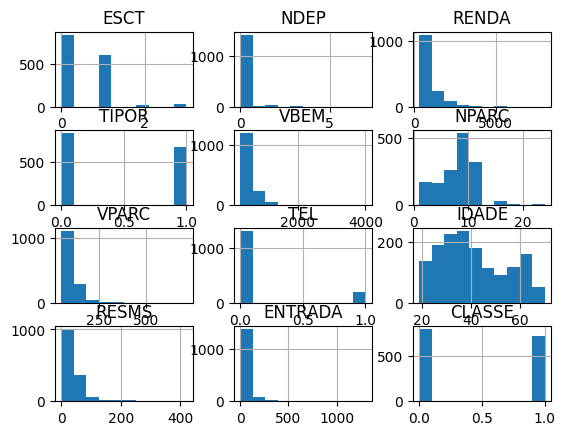

In [5]:
# Define o nomes das colunas
nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

# Carrega o dataset
dataset = pd.read_csv('../data/credtrain.txt', names=nomes_colunas, sep='\t', header=0)

dataset.hist()

dataset.head()

dataset.info()

O dataset é separado em features (X) e target (y). Depois o dataset é dividido em uma parte para o Teste, outro para treinamento. Foi utilizado o método Two-Way holdout que divide em apenas dois segmentos.

Para equalizar os dados de entrada (feature), foi aplicado a função StandardScaler, uma vez que os dados tem grandes variações nas faixas de valores. Neste caso, esta função apresenta bons resultados onde a Variância é significativa.

array([[<Axes: title={'center': 'ESCT'}>,
        <Axes: title={'center': 'NDEP'}>,
        <Axes: title={'center': 'RENDA'}>],
       [<Axes: title={'center': 'TIPOR'}>,
        <Axes: title={'center': 'VBEM'}>,
        <Axes: title={'center': 'NPARC'}>],
       [<Axes: title={'center': 'VPARC'}>,
        <Axes: title={'center': 'TEL'}>,
        <Axes: title={'center': 'IDADE'}>],
       [<Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>,
        <Axes: title={'center': 'CLASSE'}>]], dtype=object)

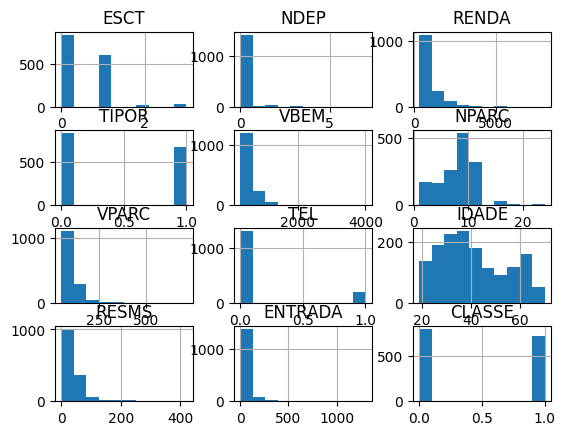

In [6]:


# Split the dataset into features (X) and the target variable (y)
X = dataset.drop('CLASSE', axis=1)
y = dataset['CLASSE']

# Split the data into a training set and a testing set (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dataset.hist()




In [7]:
import matplotlib.pyplot as plt
ClassAIndices=dataset.where(y==0)
ClassAIndices=ClassAIndices[0].tolist()
ClassBIndices=dataset.where(y==1)
ClassBIndices=ClassBIndices[0].tolist()
 
XclassA=X[ClassAIndices,:]
XclassB=X[ClassBIndices,:]
yclassA=y[ClassAIndices]
yclassB=y[ClassBIndices]

plt.scatter(XclassA[:,0],XclassA[:,1], color='blue', marker='x', label='Class A')
plt.scatter(XclassB[:,0],XclassB[:,1], color='red', marker='o', label='Class B') 
plt.xlabel('X1 feature') 
plt.ylabel('X2 feature') 
plt.legend()
plt.savefig('finalFigure.png')
plt.show()     


KeyError: 0